In [3]:
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

from notears import linear, nonlinear, utils

In [22]:
d = 10
n = 100
s0 = 10
graph_type = "ER" 

B_true = utils.simulate_dag(d, s0, graph_type)
W = utils.simulate_parameter(B_true)
X = utils.simulate_linear_sem(B_true, n, "gauss")

In [23]:
X.std(axis=0)

array([2.35521909, 1.81861205, 2.75289236, 0.95933978, 4.68800836,
       1.47043242, 0.99701459, 2.09769065, 2.01117479, 0.94668218])

In [24]:
g = ig.Graph.Adjacency(B_true, loops=False)
g.vs["label"] = list(range(d))

sorting = g.topological_sorting()

print(sorting)

[3, 6, 9, 1, 5, 2, 7, 8, 4, 0]


In [68]:
# NORMALIZE
X = (X  - X.mean(axis=0)) / X.std(axis=0)

X_ = var_sort_lin(X, d, sorting)

# CONTROL VARSORT
X[:, sorting] *= np.linspace(1, 10, d)

In [69]:
X.std(axis=0)

array([10.,  4.,  6.,  1.,  9.,  5.,  2.,  7.,  8.,  3.])

In [70]:
X_.std(axis=0)

array([10.,  4.,  6.,  1.,  9.,  5.,  2.,  7.,  8.,  3.])

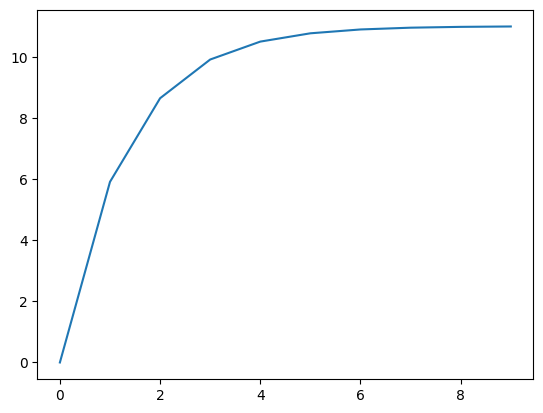

In [54]:
vars = np.logspace(1, d+1, d, base=0.5)
vars = np.full(vars.shape, vars.max()) - vars
vars /= (vars[-1] / (d+1))

plt.plot(np.arange(0, d, 1), vars)


In [52]:
np.full(vars.shape, 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
def var_sort_lin(X_norm, d, sorting):
    X_varsort = X.copy()
    X_varsort[:, sorting] *= np.linspace(1, d, d)
    return X_varsort